### knn

In [2]:
import mglearn

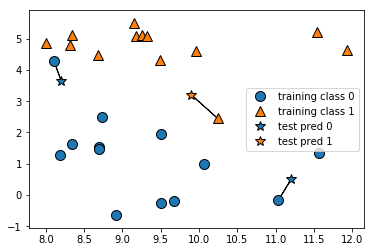

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

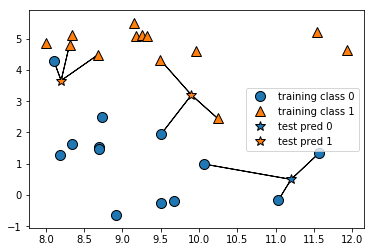

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3) 
#데이터 포인트 3개 추가, 추가한 각 데이터포인트에서 가장 가까운 훈련 데이터 포인트 연결
#1-최근접이웃알고리즘의 예측은 이 데이터 포인트의 레이블이 됨

In [7]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 데이터셋을 훈련셋과 테스트셋으로 나눔

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# KNeighborsClassifier를 import한 뒤 객체 생성 clf
# 이웃 수 지정

In [14]:
clf.fit(X_train, y_train) 
# 훈련세트를 사용하여 분류 모델 학습
# 학습내용 : 예측할때 이웃을 찾을 수 있도록 데이터 저장

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("테스트셋 예측 : {}".format(clf.predict(X_test)))
#predict메서드 호출하여예측
# 테스트셋의 각 데이터포인트에 대해 훈련셋에 가장 가까운 이웃을 계산한다음 가장 많은 클래스를 찾음

테스트셋 예측 : [1 0 1 0 1 0 0]


In [16]:
print("테스트셋 정확도 : {}".format(clf.score(X_test, y_test)))

테스트셋 정확도 : 0.8571428571428571


### KNeighborsClassifier 분석

In [21]:
import matplotlib.pyplot as plt

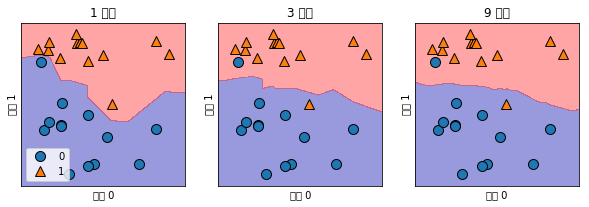

In [24]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

### 위스콘신 유방암 데이터셋

In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [32]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

In [33]:
for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    #훈련 셋 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

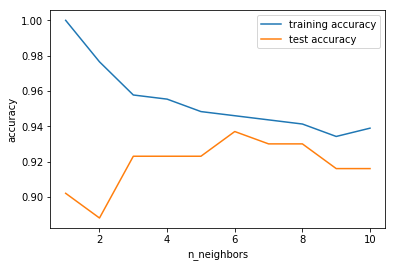

In [35]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()